# **17차시: 앙상블 모델과 성능 평가**
## 🔍 **학습목표**
- 앙상블 학습의 개념을 이해하고, 다양한 앙상블 모델을 적용할 수 있다.
- 회귀 및 분류 문제에 RandomForest, XGBoost, GradientBoost를 적용할 수 있다.

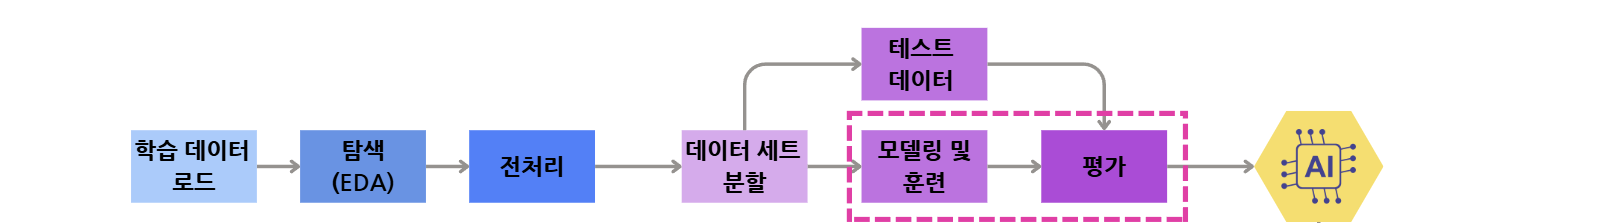


## **📌 앙상블 학습개념**

**앙상블:Ensemble**이란?
- 여러 개의 모델을 결합하여 **하나의 더 강력한 모델**을 만드는 기법 --> 집단지성
- 약한 학습기(weak learner)를 모아 강한 학습기(strong learner)를 만든다.

**주요 방법**
- **Bagging**: 여러 모델을 병렬로 학습 → 예: RandomForest
- **Boosting**: 순차적으로 학습 → 이전 오류를 보완 → 예: XGBoost, GradientBoost


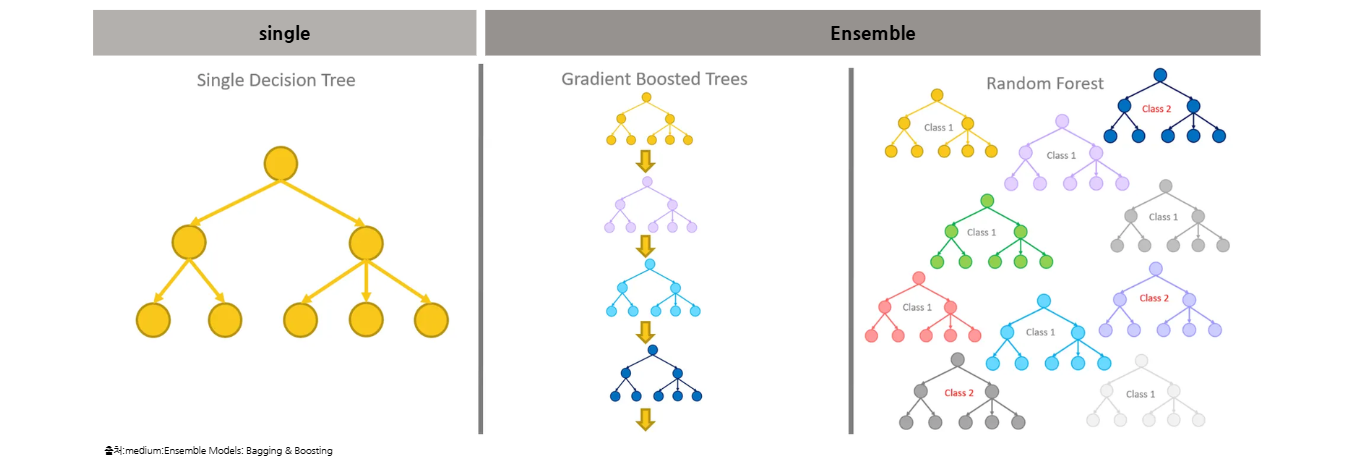

## **📌 앙상블 알고리즘 비교**

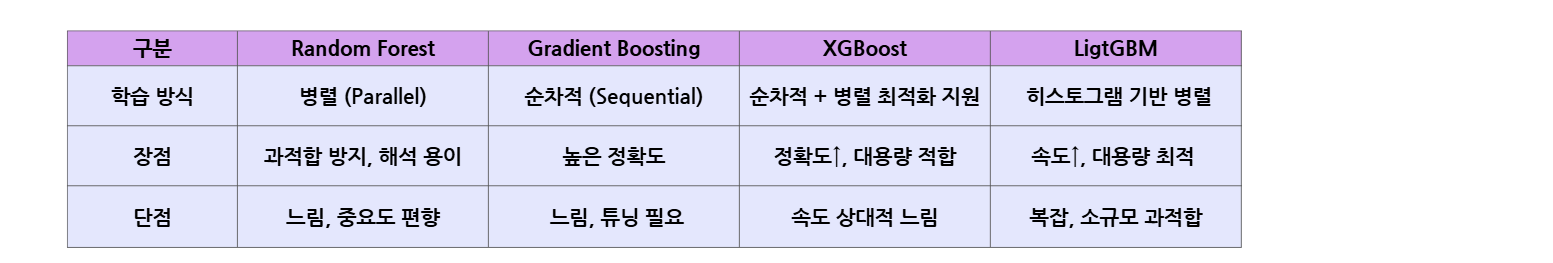

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 학습용 데이터 생성 (공부시간, 집중도 → 합격여부)
df = pd.DataFrame({
    'time': [8, 12, 14, 18, 21, 22, 17, 13, 15, 19],
    'focus': [0.5, 0.7, 0.6, 0.8, 0.9, 0.95, 0.85, 0.7, 0.75, 0.88],
    'pass': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
})


#feature, label 분리

X = df.drop('pass',axis=1)
y = df['pass']

#훈련/검증 데이터 분리
#클래스 균형적으로 분할:stratify=y
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=8, stratify=y)


In [5]:
#사이킷런 라이브러리 코드
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

#xgboost,lightgbm는 사이킷런 라이브러리가 아님!!
#각각 독자적으로 개발된 별개의 프로젝트이지만 사이킷런과 API는 호환되도록 만듬
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier,LGBMRegressor

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("rf예측:",y_pred_rf)

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
print("gb예측:",y_pred_gb)

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
print("xgb예측:",y_pred_xgb)

# lgbm = LGBMClassifier()
# lgbm.fit(x_train, y_train)
# y_pred_lgbm = lgbm.predict(x_test)
# print("lgbm예측:",y_pred_lgbm)


print("실제:",y_test.values)


rf예측: [1 1 0]
gb예측: [1 1 0]
xgb예측: [1 1 1]
실제: [1 1 0]


> - 위의 알고리즘들은 각기 다른 계열의 모델로, AICE 시험에서는 직접 타이핑해야 합니다.
> - '어떤 계열의 모델인지', '라이브러리 임포트 경로와 스펠링'을 정확히 기억해두는 것이 중요합니다.
> - 예) 앙상블은 ensemble, xgboost는 별도의 라이브러리

## ✅**회귀 vs 분류 문제 적용 예시**

| 문제 유형 | 사용 모델 예시 |
|-----------|----------------|
| 분류      | RandomForestClassifier, XGBClassifier, GradientBoostingClassifier |
| 회귀      | RandomForestRegressor, XGBRegressor, GradientBoostingRegressor   |

---

## **연습 문제**

### **온라인 교육 플랫폼 회원 이탈 예측 모델**

**[데이터 설명: online_edu_churn.csv]**
- age: 사용자 나이 (일부 결측값 있음)
- salary: 사용자의 연간 추정 소득 (단위: 원)
- experience_years: 해당 분야 또는 업무 경력 (년 단위)
- weekly_study_hours: 주당 평균 학습 시간 (시간)
- courses_completed: 수강 완료한 강의 수
- login_days_past30: 최근 30일 간 로그인한 총 일수
- membership: 회원 등급 (예: basic, premium 등)
- device: 주 사용 기기 (예: desktop, mobile, tablet)
- region: 거주 지역 (예: 서울특별시, 경기도 등)
- promo_opt_in: 마케팅 수신 동의 여부 (1: 동의, 0: 비동의)
- num_promo_emails_last3m: 최근 3개월간 받은 프로모션 이메일 수
- **churn: 이탈 여부 (1: 이탈, 0: 유지) → Target**

### **문제 1. 데이터를 로드하고 결측치/인코딩을 처리하시오.**

- `online_edu_churn.csv` 파일을 읽고 데이터프레임 변수 `df`에 저장하시오.
- 결측치는 삭제하시오.
- `obj_cols` 변수에 할당된 컬럼에 대해서는 Label encoding 적용하고, `df`변수에 저장하시오.




In [6]:
# 이 셀의 코드를 먼저 실행하시오.
obj_cols = ['membership', 'device', 'region']

In [ ]:
# 여기에 코드를 작성하세요.
import pandas as pd

# 데이터 로드
df = pd.read_csv("online_edu_churn.csv")

# 데이터 전처리
df = df.dropna()

In [ ]:
import pandas as pd

# 데이터 로드
df = pd.read_csv("online_edu_churn.csv")

# 데이터 전처리
df = df.dropna()

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in obj_cols:
    df[col] = le.fit_transform(df[col])

### **문제 2. X, y 데이터를 분리하고 훈련/검증 데이터로 나누시오.**
- 사용 데이터 프레임: df

In [ ]:
# 여기에 코드를 작성하세요.

In [ ]:
X = df.drop('churn', axis=1)
y = df['churn']
X.shape, y.shape

((3905, 11), (3905,))

### **문제 3.  학습/검증 데이터로 분할하시오.**
- 훈련:검증 = 8:2
- random_state = 42
- 클래스가 균형있게 분할될 것:stratify
- train_test_split 사용
- 결과는 다음 변수에 저장할 것:X_train, X_valid, y_train, y_valid

In [ ]:
# 여기에 코드를 작성하세요.
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


### **문제 4. 다음 조건으로 모델을 학습하시오.**
- Logistic Regression
  - 기본 설정 사용

- RandomForest
  - `max_depth = 5`
  - `min_samples_split = 4`
  - `random_state = 42`

- XGBoost
  - `n_estimators = 200`
  - `learning_rate = 0.1`
  - `max_depth = 5`
  - `subsample = 0.8`

- 각 모델을 학술하고 다음 변수에 저장하시오:
  - `logi`: LogisticRegression 모델
  - `rf` : RandomForest 모델
  - `xgb` : XGBoost 모델

In [ ]:
# 여기에 코드를 작성하세요.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# logi = LogisticRegression()
# logi.fit(  , )


# rf = RandomForestClassifier()
# rf.fit(  , )

# xgb = XGBClassifier( )
# xgb.fit(  , )

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

logi = LogisticRegression()
logi.fit(X_train, y_train)


rf = RandomForestClassifier(max_depth=5, min_samples_split=4, random_state=42)
rf.fit(X_train, y_train)

xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, subsample=0.8)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

### **문제 5. 검증 데이터를 활용하여 정확도(accuracy)를 계산하고, 가장 높은 모델명을 변수 답안05에 저장하시오.**

- 각 모델에 대해 예측값을 다음 변수에 저장하시오:
    - y_pred_logi, y_pred_rf, y_pred_xgb
- accuracy를 비교하여 가장 높은 정확도의 모델명을 답안05에 저장하시오.
(예: 'logistic', 'randomforest', 'xgboost')

In [ ]:
# 여기에 코드를 작성하세요.

from sklearn.metrics import accuracy_score

# y_pred_logi = logi.predict()
# y_pred_rf = rf.predict()
# y_pred_xgb = xgb.predict()

# acc_logi = accuracy_score(, )
# acc_rf = accuracy_score(, )
# acc_xgb = accuracy_score(, )


In [ ]:
from sklearn.metrics import accuracy_score

y_pred_logi = logi.predict(X_valid)
y_pred_rf = rf.predict(X_valid)
y_pred_xgb = xgb.predict(X_valid)

acc_logi = accuracy_score(y_valid, y_pred_logi)
acc_rf = accuracy_score(y_valid, y_pred_rf)
acc_xgb = accuracy_score(y_valid, y_pred_xgb)

# 정확도 비교
print("정확도 비교:", acc_logi,acc_rf, acc_xgb)
답안05 = "xgboost"
답안05

정확도 비교: 0.6811779769526248 0.9910371318822023 0.9935979513444302


'xgboost'